In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

### 다중 플랏
- 이거 솔직히 다이해 안된다

<Axes:>

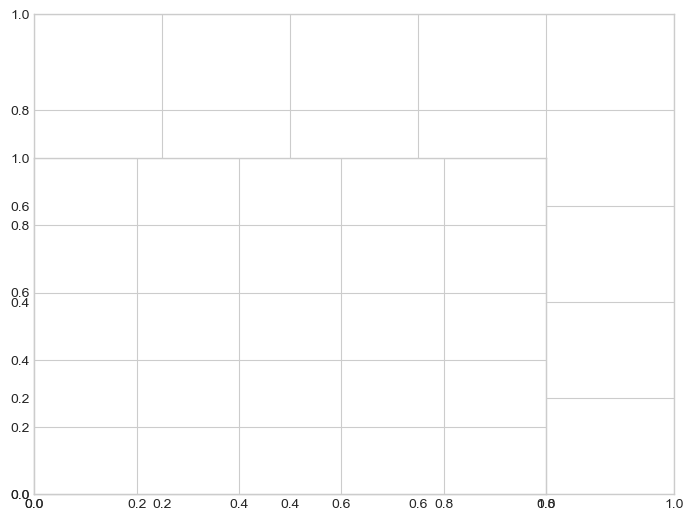

In [7]:
# 일단 막연하게 이해해보자
fig = plt.figure()
fig.add_axes([0.1,0.5,1,1])
fig.add_axes([0.1,0.5,0.8,0.7])

<bound method Figure.get_size_inches of <Figure size 640x480 with 0 Axes>>


Bbox([[0.0, 0.6], [0.6, 1.1]])

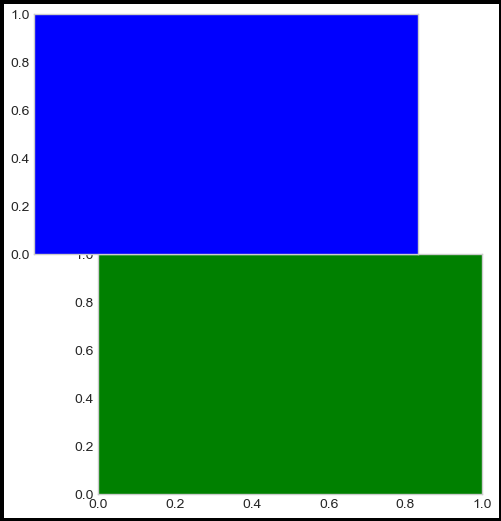

In [65]:
fig = plt.figure(linewidth=5,edgecolor='k')
print(fig.get_size_inches)
ax1 = fig.add_axes([0.1,0.1,0.6,0.5],facecolor='g') # x축 10%, y축 20%에서 시작 , 가로 100% 세로 50%
ax2 = fig.add_axes([0,0.6,0.6,0.5],facecolor='b',xticks=[]) # x축 10%, y축 70%에서 시작
ax1.grid(False)
ax2.grid(False)

# 패널 상단의 위치 0.6(시작점) = 패널 하단 0.1 + 0.5(끝점)


Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]])

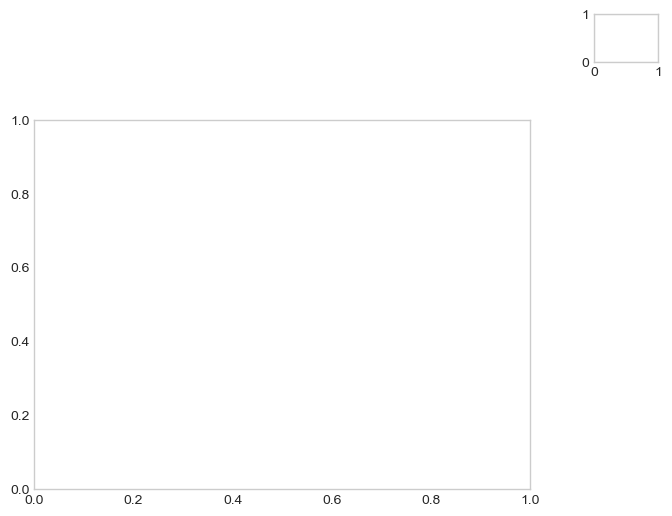

In [63]:
# plt.axes도 동일하다
fig = plt.figure()
ax1 =plt.axes()
ax1.grid(False)
ax2 = plt.axes([1,1,0.1,0.1])
ax1.get_position()

### 간단한 다중플랏

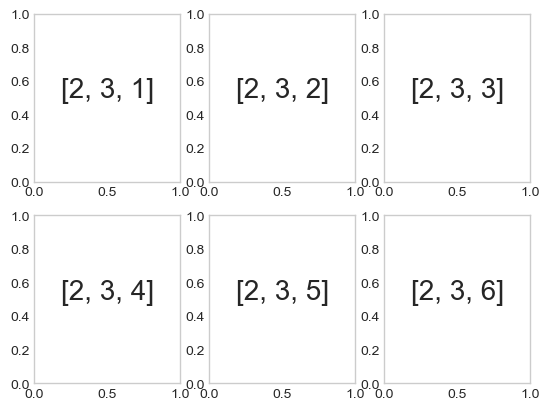

In [71]:
# plt.subplot()
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.grid(False)
    plt.text(0.5,0.5,str([2,3,i]),ha='center',fontsize=20)

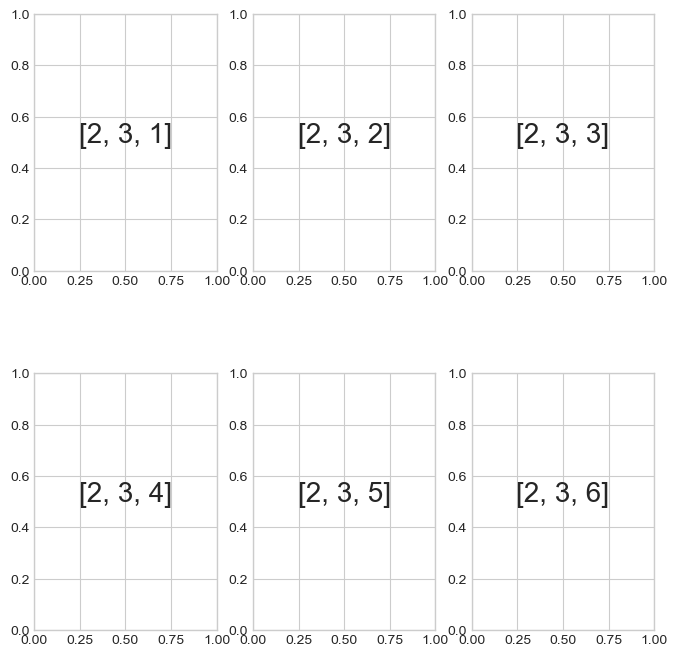

In [86]:
# fig.add_subplot()
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str([2,3,i]),ha='center',fontsize=20)

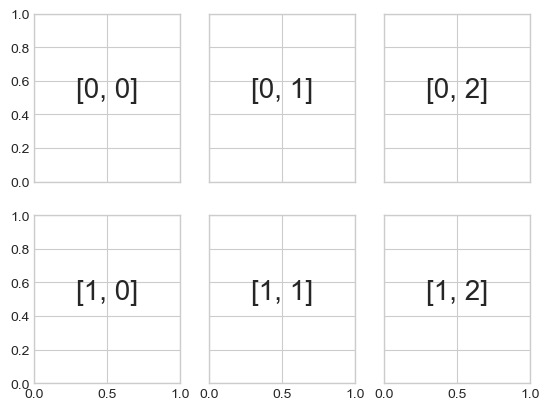

In [96]:
# plt.subplots()
fig, ax = plt.subplots(2,3,sharex='col',sharey='row')

# ax는 ndarray임에 유이하자

for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str([i,j]),fontsize=20,ha='center')

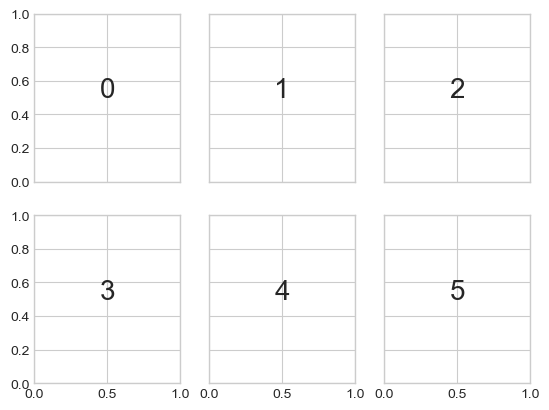

In [98]:
# plt.subplots()
fig, ax = plt.subplots(2,3,sharex='col',sharey='row')

# ax는 ndarray임에 유이하자
# 그냥 순차적으로 꺼낼수도 있다 순서에 유의하자

for i, ax in enumerate(ax.flat):
    ax.text(0.5,0.5,str(i),fontsize=20,ha='center')
    

### 복잡한 배치
- 컨셉은 간단하다 slicing이다

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

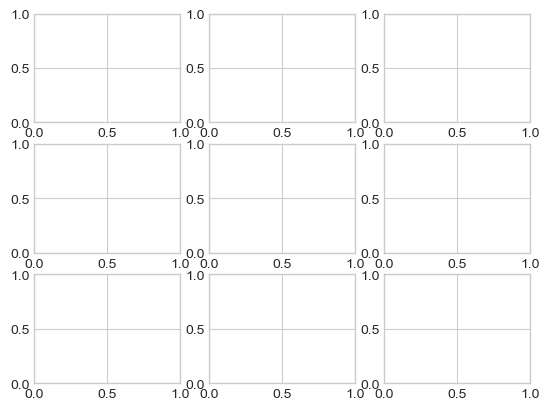

In [100]:
fig, ax = plt.subplots(3,3)
# 이런식으로 미리 만들어 놓으면 불가능하다

In [103]:
# 이것도 안되네
fig = plt.figure()
plt.subplot(2,3,1:3)

SyntaxError: invalid syntax (821195909.py, line 2)

<AxesSubplot:>

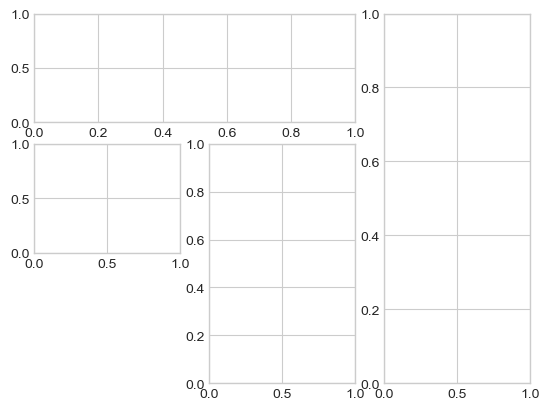

In [111]:
# Grid 객체 필요
grid = plt.GridSpec(3,3,hspace=0.2,wspace=0.2)
plt.subplot(grid[0,0:2])
plt.subplot(grid[1,0])
plt.subplot(grid[1:3,1])
plt.subplot(grid[:,2])


<AxesSubplot:>

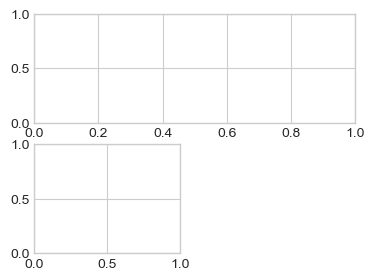

In [120]:
# add_subplot 도 가능
fig = plt.figure()
grid = plt.GridSpec(3,3,hspace=0.2,wspace=0.2)
fig.add_subplot(grid[0,0:2])
fig.add_subplot(grid[1,0])

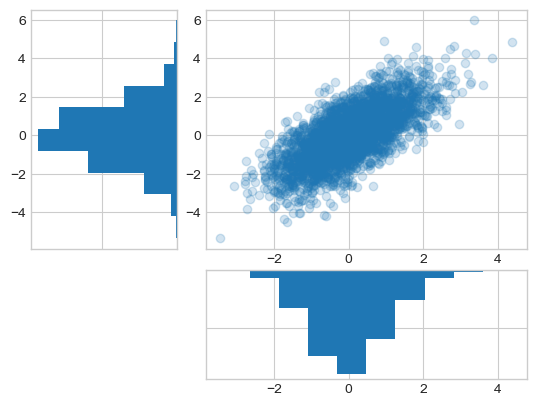

In [172]:
# 이차원 정규분포 만들어보자

mean = [0,0]
cov = [[1,1],[1,2]]

x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure()
grid = plt.GridSpec(3,3)
main_ax = fig.add_subplot(grid[0:2,1:3])
x_ax = fig.add_subplot(grid[2,1:],yticklabels=[],sharex=main_ax)
y_ax = fig.add_subplot(grid[0:2,0],xticklabels=[],sharey=main_ax)
main_ax.scatter(x,y,alpha=0.2)
x_ax.hist(x,orientation='vertical')
x_ax.invert_yaxis()

y_ax.hist(y,orientation='horizontal')
y_ax.invert_xaxis()

Text(0.5, 1.0, 'y축 대칭')

/Users/iganghui/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iganghui/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/iganghui/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52845 (\N{HANGUL SYLLABLE CING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


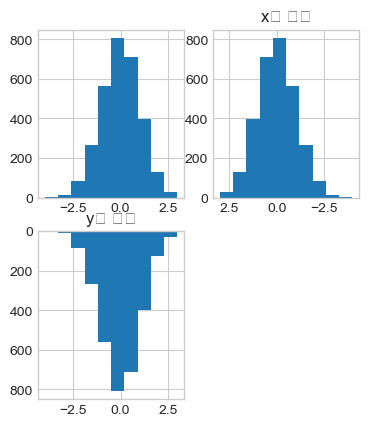

In [167]:
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax1.hist(x)
ax2 = fig.add_subplot(2,3,2)
ax2.hist(x)
ax2.invert_xaxis()
ax2.set_title('x축 따라서 대칭')
ax3 = fig.add_subplot(2,3,4)
ax3.hist(x)
ax3.invert_yaxis()
ax3.set_title('y축 따라서 대칭')